<table class="table table-bordered">
    <tr>
        <th style="text-align:center; vertical-align: middle; width:50%"><img src='https://www.np.edu.sg/images/default-source/default-album/img-logo.png'"></th>
        <th style="text-align:center;"><h1>Deep Learning</h1><h2>Assignment 1 - Food Classification Model (Individual)</h2><h3>AY2023/24 Semester</h3></th>
    </tr>
</table>

#### Name: Akul Arun
#### Student ID: S10243523

In [1]:
# Import the Required Packages
from tensorflow import keras
import os
import matplotlib.pyplot as plt
%matplotlib inline

*Note: More Packages will be imported along the way

## Step 1: Data Loading

In [2]:
train_dir = os.path.join(os.getcwd(), 'train')
test_dir = os.path.join(os.getcwd(), 'test')
validation_dir = os.path.join(os.getcwd(), 'validation')

## Step 2:  Develop the Image Classification Baseline Model

In [3]:
# Build the Model
from tensorflow.keras import layers
from tensorflow.keras import models

img_size = 150

base_model = models.Sequential()
base_model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
base_model.add(layers.MaxPooling2D((2, 2)))
base_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
base_model.add(layers.MaxPooling2D((2, 2)))
base_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
base_model.add(layers.MaxPooling2D((2, 2)))
base_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
base_model.add(layers.MaxPooling2D((2, 2)))
base_model.add(layers.Flatten())
base_model.add(layers.Dense(512, activation='relu'))
base_model.add(layers.Dense(10, activation='softmax'))


In [4]:
base_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [5]:
from tensorflow.keras import optimizers

base_model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=20,
    class_mode='categorical')
            
validation_generator = validation_datagen.flow_from_directory(
     validation_dir,
     target_size=(img_size, img_size),
     batch_size=20,
     class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=20,
    class_mode='categorical')


Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Found 500 images belonging to 10 classes.


In [7]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    tmp_plot=data_batch[0]
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20, 10)


In [8]:
# Train the Model
from keras.callbacks import ModelCheckpoint

# Checkpoint
mc = ModelCheckpoint(
    'Baseline.keras',
    monitor='val_loss',
    mode='min',
    verbose=1,
    save_best_only=True
)

base_history = base_model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    callbacks=[mc]
)


Epoch 1/30
375/375 [==============================] - ETA: 0s - loss: 2.1206 - acc: 0.2301
Epoch 1: val_loss improved from inf to 2.00199, saving model to Baseline.keras
375/375 [==============================] - 37s 85ms/step - loss: 2.1206 - acc: 0.2301 - val_loss: 2.0020 - val_acc: 0.2840
Epoch 2/30
375/375 [==============================] - ETA: 0s - loss: 1.9091 - acc: 0.3327
Epoch 2: val_loss improved from 2.00199 to 1.91263, saving model to Baseline.keras
375/375 [==============================] - 28s 74ms/step - loss: 1.9091 - acc: 0.3327 - val_loss: 1.9126 - val_acc: 0.3335
Epoch 3/30
375/375 [==============================] - ETA: 0s - loss: 1.7782 - acc: 0.3833
Epoch 3: val_loss improved from 1.91263 to 1.81523, saving model to Baseline.keras
375/375 [==============================] - 28s 76ms/step - loss: 1.7782 - acc: 0.3833 - val_loss: 1.8152 - val_acc: 0.3680
Epoch 4/30
375/375 [==============================] - ETA: 0s - loss: 1.6690 - acc: 0.4253
Epoch 4: val_loss impr

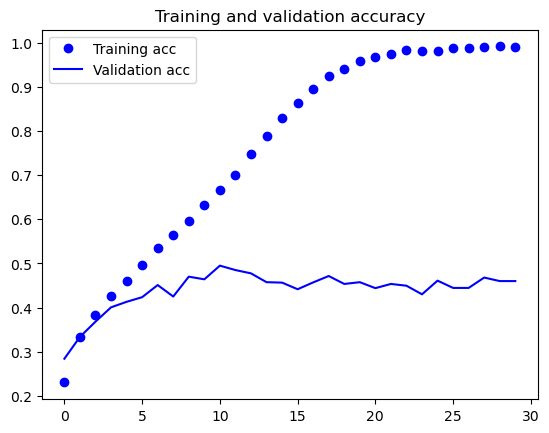

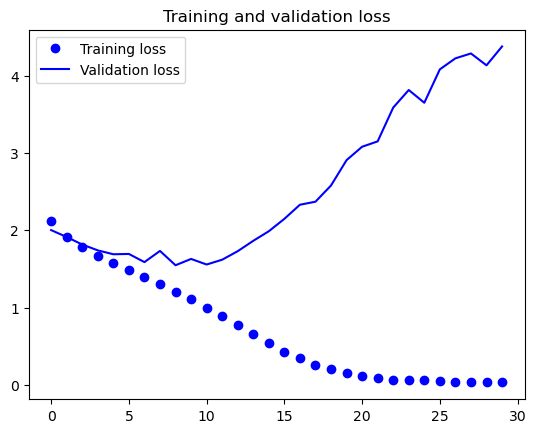

In [9]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = base_history.history['acc']
val_acc = base_history.history['val_acc']
loss = base_history.history['loss']
val_loss = base_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [1]:
from tensorflow import keras
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_dir = os.path.join(os.getcwd(), 'test')
img_size = 224
base_test = keras.models.load_model('Baseline.keras')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=20,
    class_mode='categorical')

evaluation_results = base_test.evaluate(test_generator, steps=len(test_generator))

print("Test Loss:", evaluation_results[0])
print("Test Accuracy:", evaluation_results[1])

Found 500 images belonging to 10 classes.
25/25 [==============================] - 5s 64ms/step - loss: 2.0786 - acc: 0.2560
Test Loss: 2.078618049621582
Test Accuracy: 0.25600001215934753
